#Klasifikasi (dengan Hyperparameter Tuning)

Dataset: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

Setelah ditentukan fitur-fitur yang akan digunakan sesuai dengan hasil visualisasi di Colab0: https://colab.research.google.com/drive/12xwqqv7F0ZF7hytN2U5kmlGr0_lHeOhG?ouid=106950143032811372632&usp=drive_link

Maka, dibuatlah klasifikasi dengan menggunakan algoritma machine learning yang bertujuan untuk prediksi customer churn pada e-commerce XYZ.

Parameter algoritma klasifikasi yang digunakan yaitu hyperparameter tuning (berdasarkan rangkuman parameter https://docs.google.com/spreadsheets/d/1SwdHlndnVU8mGfc1X6n9RxK3bcWqKYSO6sVfMsIndkU/edit?usp=sharing ) yaitu:
1. Skema 10 Algoritma Random Forest
2. Skema 10 Algoritma SVM
3. Skema 10 Algoritma Decision Tree


Fitur yang dipakai adalah 5 fitur yang paling berkolerasi dengan label churn yaitu:

1. Complain
2. PreferedOrderCat
3. MaritalStatus
4. SatisfactionScore
5. NumberOfDeviceRegistered

In [1]:
#Data Loading

import pandas as pd

url = "https://github.com/ranidsr/projekmsib/raw/main/E%20Commerce%20Dataset.xlsx"
df = pd.read_excel(url, sheet_name='E Comm')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [2]:
#Update Dataframe berdasarkan fitur yang digunakan saja

df=df[['Churn', 'Complain', 'PreferedOrderCat', 'MaritalStatus', 'SatisfactionScore', 'NumberOfDeviceRegistered']]
df

,Churn,Complain,PreferedOrderCat,MaritalStatus,SatisfactionScore,NumberOfDeviceRegistered
0,1,1,Laptop & Accessory,Single,2,3
1,1,1,Mobile,Single,3,4
2,1,1,Mobile,Single,3,4
3,1,0,Laptop & Accessory,Single,5,4
4,1,0,Mobile,Single,5,3
...,...,...,...,...,...,...
5625,0,0,Laptop & Accessory,Married,1,2
5626,0,0,Fashion,Married,5,5
5627,0,1,Laptop & Accessory,Married,4,2
5628,0,0,Laptop & Accessory,Married,4,5


In [3]:
#Merge Data yang sama

#Di PreferredOrderCat, 'Mobile' dan 'Mobile Phone' digabung
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

df['PreferedOrderCat'].value_counts()

Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [4]:
#Lihat rangkuman data apakah ada missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Churn                     5630 non-null   int64 
 1   Complain                  5630 non-null   int64 
 2   PreferedOrderCat          5630 non-null   object
 3   MaritalStatus             5630 non-null   object
 4   SatisfactionScore         5630 non-null   int64 
 5   NumberOfDeviceRegistered  5630 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 264.0+ KB


In [5]:
#Encoding

from sklearn.preprocessing import StandardScaler , LabelEncoder
le = LabelEncoder()

for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df

C:\Users\hp\AppData\Local\Temp\ipykernel_11800\3952574895.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
C:\Users\hp\AppData\Local\Temp\ipykernel_11800\3952574895.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])


,Churn,Complain,PreferedOrderCat,MaritalStatus,SatisfactionScore,NumberOfDeviceRegistered
0,1,1,2,2,2,3
1,1,1,3,2,3,4
2,1,1,3,2,3,4
3,1,0,2,2,5,4
4,1,0,3,2,5,3
...,...,...,...,...,...,...
5625,0,0,2,1,1,2
5626,0,0,0,1,5,5
5627,0,1,2,1,4,2
5628,0,0,2,1,4,5


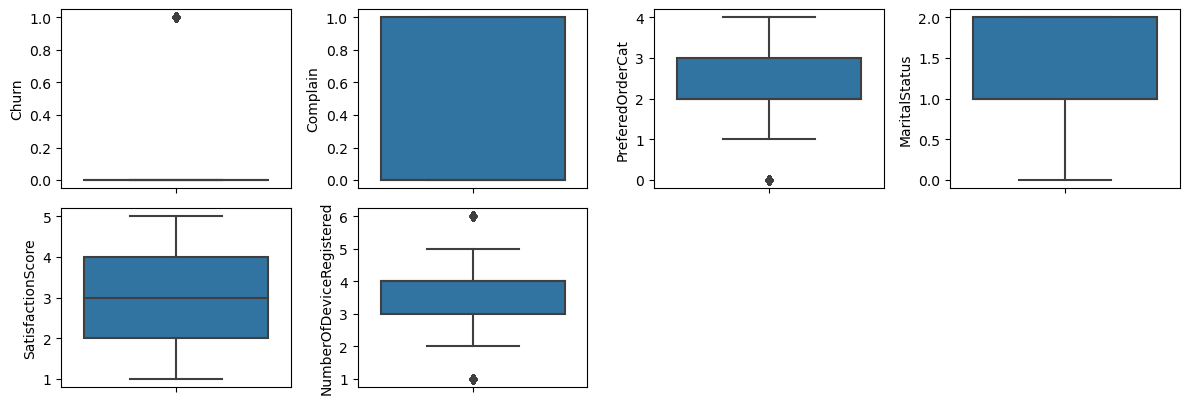

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#BoxPlot untuk melihat outliers

fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [7]:
#fungsi untuk trimming outliers dengan IQR (Inter-Quartile Range)

def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Define Upper and lower boundaries
  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  # lets make filter for col values
  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

df.columns

Index(['Churn', 'Complain', 'PreferedOrderCat', 'MaritalStatus',
       'SatisfactionScore', 'NumberOfDeviceRegistered'],
      dtype='object')

In [8]:
#apply fungsi ke kolom yang memiliki outliers

cols_outliers = ['PreferedOrderCat', 'NumberOfDeviceRegistered']
for col in cols_outliers:
    df = handle_outliers(df , col)

df.head()

,Churn,Complain,PreferedOrderCat,MaritalStatus,SatisfactionScore,NumberOfDeviceRegistered
0,1,1,2,2,2,3
1,1,1,3,2,3,4
2,1,1,3,2,3,4
3,1,0,2,2,5,4
4,1,0,3,2,5,3


In [9]:
#Lihat rangkuman data setelah trimming outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4448 entries, 0 to 5629
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Churn                     4448 non-null   int64
 1   Complain                  4448 non-null   int64
 2   PreferedOrderCat          4448 non-null   int32
 3   MaritalStatus             4448 non-null   int32
 4   SatisfactionScore         4448 non-null   int64
 5   NumberOfDeviceRegistered  4448 non-null   int64
dtypes: int32(2), int64(4)
memory usage: 208.5 KB


In [10]:
#reset index sesuai jumlah baris data

df.reset_index()
df = pd.concat([df], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4448 entries, 0 to 4447
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Churn                     4448 non-null   int64
 1   Complain                  4448 non-null   int64
 2   PreferedOrderCat          4448 non-null   int32
 3   MaritalStatus             4448 non-null   int32
 4   SatisfactionScore         4448 non-null   int64
 5   NumberOfDeviceRegistered  4448 non-null   int64
dtypes: int32(2), int64(4)
memory usage: 173.9 KB


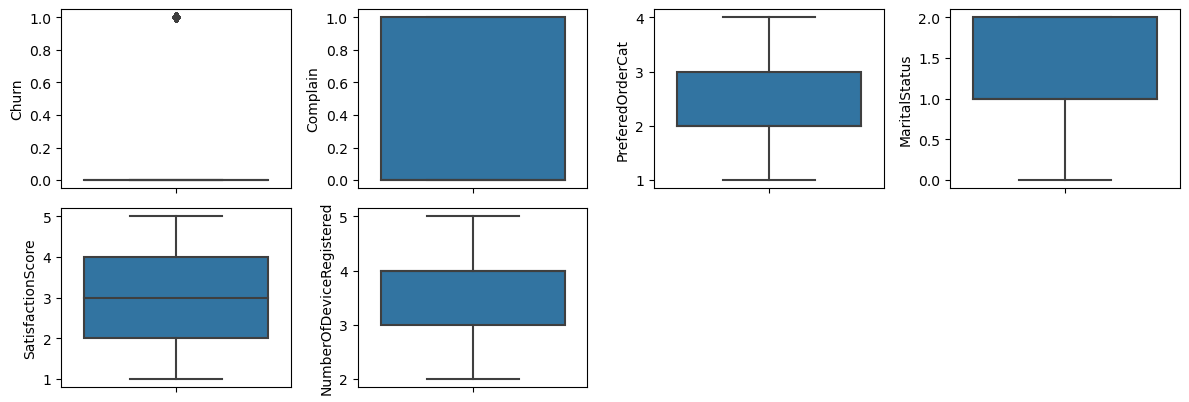

In [11]:
#Boxplot setelah Trimming Outliers

fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [12]:
#mengetahui korelasi dari tiap kolom terhadap label churn
#default method in pandas menggunakan Pearson

corr_matrix = df.corr()
corr_matrix

,Churn,Complain,PreferedOrderCat,MaritalStatus,SatisfactionScore,NumberOfDeviceRegistered
Churn,1.000000,0.274961,0.167177,0.156856,0.117313,0.079798
Complain,0.274961,1.000000,0.003805,-0.003698,-0.031006,0.001356
PreferedOrderCat,0.167177,0.003805,1.000000,0.048836,0.014099,0.020725
MaritalStatus,0.156856,-0.003698,0.048836,1.000000,-0.035863,0.044848
SatisfactionScore,0.117313,-0.031006,0.014099,-0.035863,1.000000,-0.008028
NumberOfDeviceRegistered,0.079798,0.001356,0.020725,0.044848,-0.008028,1.000000


<Axes: >

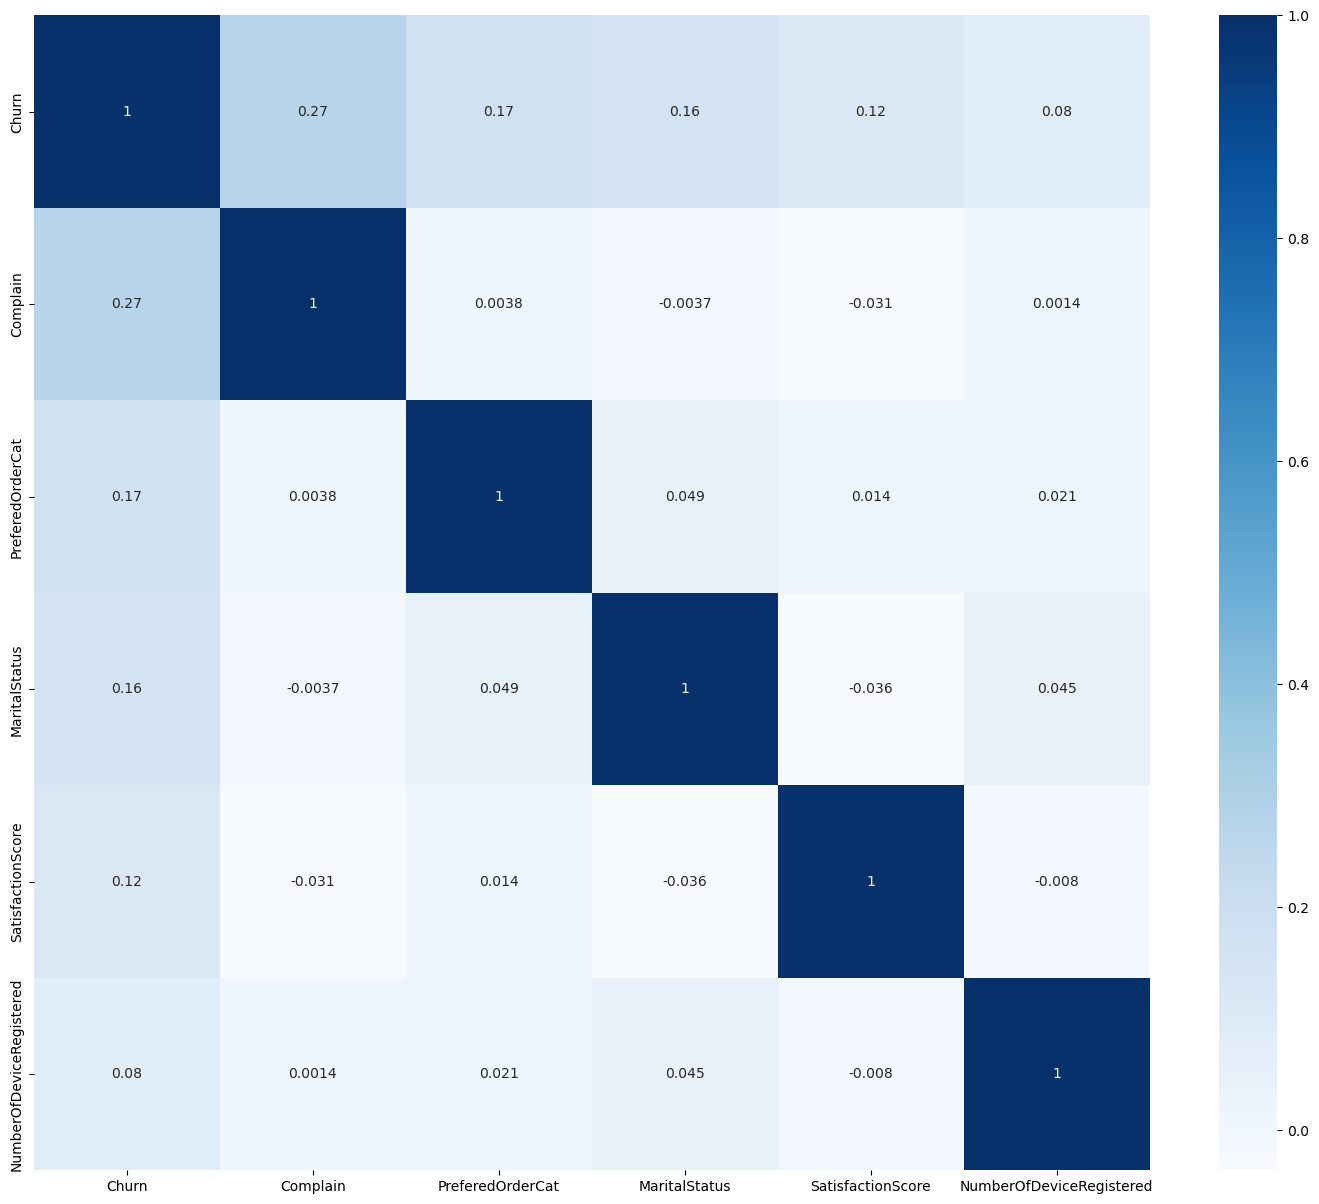

In [13]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

In [14]:
churn_corr_vector = corr_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector

Churn                       1.000000
Complain                    0.274961
PreferedOrderCat            0.167177
MaritalStatus               0.156856
SatisfactionScore           0.117313
NumberOfDeviceRegistered    0.079798
Name: Churn, dtype: float64

In [15]:
#Handling Imbalanced Data

import matplotlib.pyplot as plt
import plotly.express as px

fig = px.histogram(df, x="Churn", color="Churn" ,text_auto= True , title="<b>"+'Check Imbalance' , color_discrete_sequence = ['#BA1F33','#3A506B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Churn',
yaxis_title='count',
)
fig.show()

In [16]:
#Over-sampling dengan SMOTE = interpolasi data baru dari data minoritas yang besar kemungkinannya membuat sample yang noisy
#Under-sampling dengan Tomek Links = membersihkan noisy samples dengan under-sampling

from imblearn.combine import SMOTETomek

X = df.drop('Churn' , axis = 1)
Y = df['Churn']

smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(X , Y)

x_over.shape, y_over.shape

((7400, 5), (7400,))

#Classification Modelling

Model algoritma yang digunakan yaitu:


1.   Random Forest
2.   SVM
3.   Decision Tree

dengan hyperparameter tuning menggunakan GridSearchCV.



#Skema 10

1. Random Forest
    max_depth = {None, 100, 200, 300, 400, 500, 1000}
    min_samples_leaf = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
    min_samples_split = {2, 3, 4, 5, 6, 7, 8, 9, 10}

2. SVM
    kernel = {'linear', 'rbf', 'poly', 'sigmoid'}
    C = {0.001, 0.01, 0.1, 1, 10, 100, 1000}
    gamma = {1, 0.1, 0.01, 0.001}

3. Decision Tree
    max_depth = {None, 100, 200, 300, 400, 500, 1000}
    min_samples_leaf = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
    min_samples_split = {2, 3, 4, 5, 6, 7, 8, 9, 10}


In [17]:
#Split Data

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x_over , y_over , test_size = 0.30 , random_state = 42)

In [18]:
#Normalisasi Data

from sklearn.preprocessing import MinMaxScaler

MN = MinMaxScaler()
x_train_scaled = MN.fit_transform(x_train)
x_test_scaled = MN.fit_transform(x_test)

In [19]:
#Hyperparameter Tuning Algoritma Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

grid_space={'max_depth':[None, 100, 200, 300, 400, 500, 1000],
              'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
              'min_samples_split':[2,3,4,5,6,7,8,9,10]
           }


In [20]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(x_train_scaled,y_train)

In [21]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score is: 0.7675683703021313


In [22]:
#Modelling Random Forest berdasarkan best hyperparameter

rf = RandomForestClassifier(max_depth = 1000, min_samples_leaf = 1, min_samples_split = 6)
rf.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=1000, min_samples_split=6)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report

y_pred_train = rf.predict(x_train_scaled)
y_pred_test = rf.predict(x_test_scaled)
print(f'Training Score: {rf.score(x_train_scaled, y_train)}')
print(f'Test Score: {rf.score(x_test_scaled, y_test)}')
print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')

Training Score: 0.784942084942085
Test Score: 0.7725225225225225
Acc Train: 0.784942084942085
Acc Test: 0.7725225225225225


Accuracy = 0.7644144144144144
Precision = 0.751937984496124
Recall = 0.7879061371841155
F1-Score = 0.7695019832525342
ROC Area under Curve = 0.76445666571436
              precision    recall  f1-score   support

           0    0.77809   0.74101   0.75910      1112
           1    0.75194   0.78791   0.76950      1108

    accuracy                        0.76441      2220
   macro avg    0.76502   0.76446   0.76430      2220
weighted avg    0.76504   0.76441   0.76429      2220



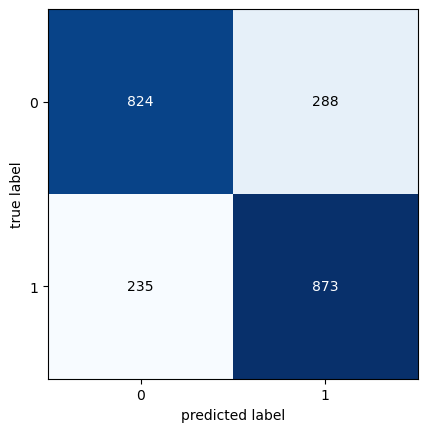

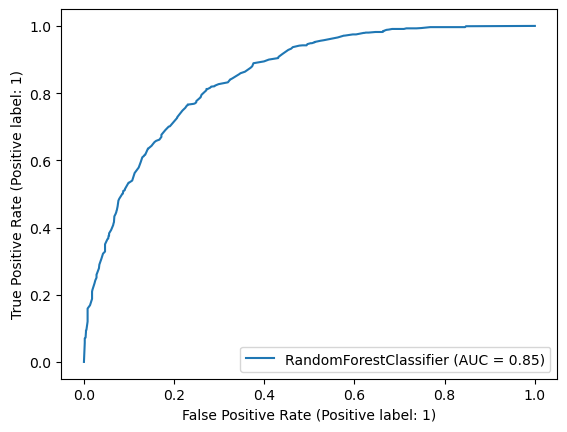

In [24]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay

rf=RandomForestClassifier(max_depth = 1000, min_samples_leaf = 1, min_samples_split = 6)
rf.fit(x_train_scaled,y_train)
y_pred = rf.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("Precision = {}".format(precision))
print("Recall = {}".format(recall))
print("F1-Score = {}".format(f1_rf))
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(rf , x_test_scaled , y_test)

In [25]:
#Hyperparameter Tuning Algoritma SVM

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svmbest = SVC()

param_grid={'kernel':['linear', 'rbf', 'poly', 'sigmoid'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'gamma':[1, 0.1, 0.01, 0.001]
           }


In [26]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits
[CV] END ....................C=0.001, gamma=1, kernel=linear; total time=   1.4s
[CV] END ....................C=0.001, gamma=1, kernel=linear; total time=   1.5s
[CV] END ....................C=0.001, gamma=1, kernel=linear; total time=   1.3s
[CV] END ....................C=0.001, gamma=1, kernel=linear; total time=   1.5s
[CV] END ....................C=0.001, gamma=1, kernel=linear; total time=   1.3s
[CV] END .......................C=0.001, gamma=1, kernel=rbf; total time=   2.7s
[CV] END .......................C=0.001, gamma=1, kernel=rbf; total time=   2.7s
[CV] END .......................C=0.001, gamma=1, kernel=rbf; total time=   2.9s
[CV] END .......................C=0.001, gamma=1, kernel=rbf; total time=   2.5s
[CV] END .......................C=0.001, gamma=1, kernel=rbf; total time=   2.5s
[CV] END ......................C=0.001, gamma=1, kernel=poly; total time=   1.2s
[CV] END ......................C=0.001, gamma=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=2)

In [27]:
print(grid.best_estimator_)

SVC(C=1000, gamma=1)


In [28]:
grid_predictions = grid.predict(x_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning:

X has feature names, but SVC was fitted without feature names



[[1112    0]
 [1108    0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1112
           1       0.00      0.00      0.00      1108

    accuracy                           0.50      2220
   macro avg       0.25      0.50      0.33      2220
weighted avg       0.25      0.50      0.33      2220



c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [29]:
#Modelling SVM berdasarkan best hyperparameter

svmbest = SVC(C = 1000, gamma = 1)
svmbest.fit(x_train_scaled, y_train)

SVC(C=1000, gamma=1)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report

y_pred_train = svmbest.predict(x_train_scaled)
y_pred_test = svmbest.predict(x_test_scaled)
print(f'Training Score: {svmbest.score(x_train_scaled, y_train)}')
print(f'Test Score: {svmbest.score(x_test_scaled, y_test)}')
print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')

Training Score: 0.7797297297297298
Test Score: 0.7666666666666667
Acc Train: 0.7797297297297298
Acc Test: 0.7666666666666667


Accuracy = 0.7666666666666667
Precision = 0.75
Recall = 0.7987364620938628
F1-Score = 0.7736013986013986
ROC Area under Curve = 0.7667243461548452
              precision    recall  f1-score   support

           0    0.78558   0.73471   0.75929      1112
           1    0.75000   0.79874   0.77360      1108

    accuracy                        0.76667      2220
   macro avg    0.76779   0.76672   0.76645      2220
weighted avg    0.76782   0.76667   0.76643      2220



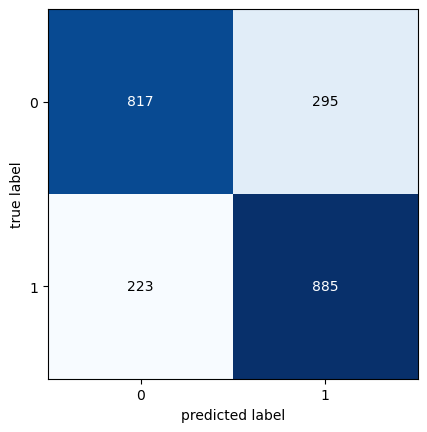

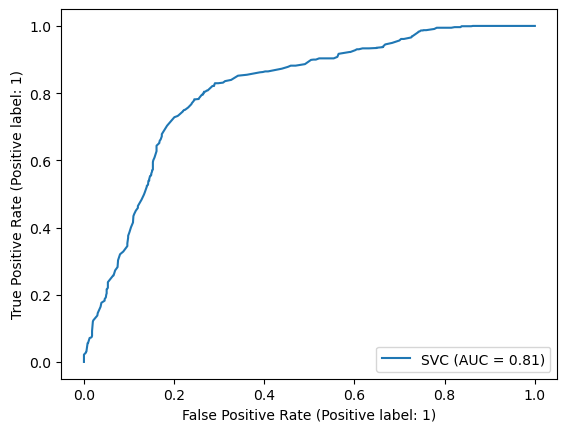

In [31]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay

svmbest=SVC(C = 1000, gamma = 1)
svmbest.fit(x_train_scaled,y_train)
y_pred = svmbest.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("Precision = {}".format(precision))
print("Recall = {}".format(recall))
print("F1-Score = {}".format(f1_svm))
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(svmbest , x_test_scaled , y_test)

In [32]:
#Hyperparameter Tuning Algoritma Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

dtbest = DecisionTreeClassifier()

param_grid={'max_depth':[None, 100, 200, 300, 400, 500, 1000],
              'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
              'min_samples_split':[2,3,4,5,6,7,8,9,10]
           }

In [33]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, verbose=1, n_jobs=-1)
grid.fit(x_train_scaled,y_train)

Fitting 10 folds for each of 630 candidates, totalling 6300 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 100, 200, 300, 400, 500, 1000],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=1)

In [34]:
grid.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [35]:
grid.best_estimator_

DecisionTreeClassifier(min_samples_split=3)

In [36]:
grid.best_score_

0.7679536679536679

In [37]:
#Modelling Decision Tree berdasarkan best hyperparameter

dtbest = DecisionTreeClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split = 5)
dtbest.fit(x_train_scaled, y_train)

DecisionTreeClassifier(min_samples_split=5)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report

y_pred_train = dtbest.predict(x_train_scaled)
y_pred_test = dtbest.predict(x_test_scaled)
print(f'Training Score: {dtbest.score(x_train_scaled, y_train)}')
print(f'Test Score: {dtbest.score(x_test_scaled, y_test)}')
print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')

Training Score: 0.784942084942085
Test Score: 0.7684684684684685
Acc Train: 0.784942084942085
Acc Test: 0.7684684684684685


Accuracy = 0.7684684684684685
Precision = 0.7628318584070797
Recall = 0.7779783393501805
F1-Score = 0.770330652368186
ROC Area under Curve = 0.768485572552788
              precision    recall  f1-score   support

           0    0.77431   0.75899   0.76658      1112
           1    0.76283   0.77798   0.77033      1108

    accuracy                        0.76847      2220
   macro avg    0.76857   0.76849   0.76845      2220
weighted avg    0.76858   0.76847   0.76845      2220



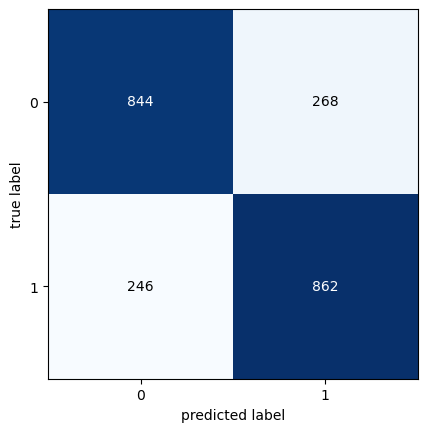

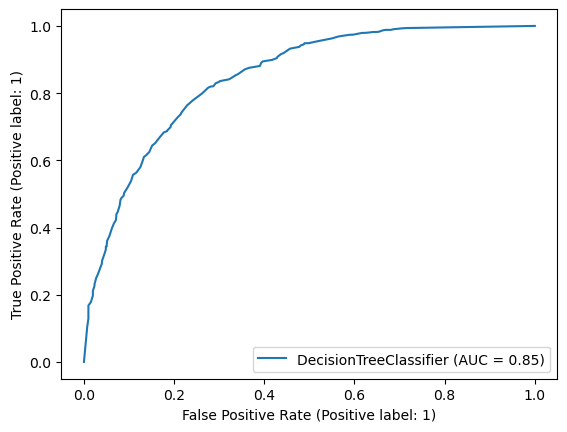

In [39]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay

dtbest=DecisionTreeClassifier(max_depth = 100, min_samples_leaf = 1, min_samples_split = 2)
dtbest.fit(x_train_scaled,y_train)
y_pred = dtbest.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("Precision = {}".format(precision))
print("Recall = {}".format(recall))
print("F1-Score = {}".format(f1_dt))
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(dtbest , x_test_scaled , y_test)

#Save Model Klasifikasi

Best Model klasifikasi = algoritma SVM hyperparameter tuning

In [40]:
from sklearn.svm import SVC

# Inisialisasi model SVM terbaik dengan parameter yang tepat
best_model_classification = SVC(C=1000, gamma=1)

#Melatih model terbaik pada data pelatihan yang telah discaling
best_model_classification.fit(x_train_scaled, y_train)

#Gunakan model untuk prediksi
prediction = best_model_classification.predict(x_test_scaled)

In [41]:
import pickle

# Simpan scaler ke dalam file 'scaler_ds.pkl'
with open('scaler_pred.pkl', 'wb') as scaler_file:
    pickle.dump(MN, scaler_file)

# Simpan model terbaik ke dalam file 'model_ds.pkl'
with open('model_pred.pkl', 'wb') as model_file:
    pickle.dump(best_model_classification, model_file)

In [43]:
import numpy as np
import pickle

# Input fitur-fitur
Complain = 1
PreferedOrderCat = 2
MaritalStatus = 2
SatisfactionScore = 2
NumberOfDeviceRegistered = 3


# Data dalam bentuk list
data = [
    [
        Complain,
        PreferedOrderCat,
        MaritalStatus,
        SatisfactionScore,
        NumberOfDeviceRegistered
    ]
]

# Load model dan skaler yang telah disimpan sebelumnya
MN = pickle.load(open('scaler_pred.pkl', 'rb'))
best_model_classification = pickle.load(open('model_pred.pkl', 'rb'))

# Standardisasi data
data_scaled = MN.transform(data)

# Prediksi hasil Status
hasil_prediksi = best_model_classification.predict(data_scaled)
hasil_prediksi = int(hasil_prediksi)

# Mapping hasil prediksi ke label yang sesuai
if hasil_prediksi == 0:
    status = "Not Churn"
elif hasil_prediksi == 1:
    status = "Churn"

# Menampilkan hasil prediksi
print(f"Hasil Prediksi Status: {status}")


Hasil Prediksi Status: Churn


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

